In [24]:
import pandas as pd
import numpy as np

import matplotlib
import seaborn
import matplotlib.dates as md
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
#from pyemma import msm # not available on Kaggle Kernel
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

In [195]:
data= pd.read_csv('system_failure.csv')

In [196]:
data.head()

,timestamp,value
0,2013-07-04 00:00:00,69.880835
1,2013-07-04 01:00:00,71.220227
2,2013-07-04 02:00:00,70.877805
3,2013-07-04 03:00:00,68.959400
4,2013-07-04 04:00:00,69.283551


In [197]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [198]:
data.head()

,timestamp,value
0,2013-07-04 00:00:00,69.880835
1,2013-07-04 01:00:00,71.220227
2,2013-07-04 02:00:00,70.877805
3,2013-07-04 03:00:00,68.959400
4,2013-07-04 04:00:00,69.283551


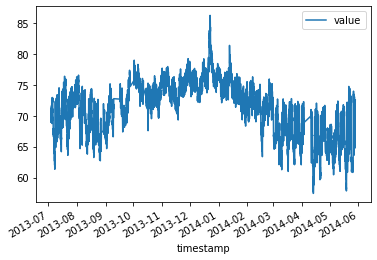

In [199]:
data.plot(x='timestamp', y='value')

In [200]:
data['hours'] = data['timestamp'].dt.hour
data['daylight'] = ((data['hours'] >= 7) & (data['hours'] <= 22)).astype(int)

In [201]:
data

,timestamp,value,hours,daylight
0,2013-07-04 00:00:00,69.880835,0,0
1,2013-07-04 01:00:00,71.220227,1,0
2,2013-07-04 02:00:00,70.877805,2,0
3,2013-07-04 03:00:00,68.959400,3,0
4,2013-07-04 04:00:00,69.283551,4,0
...,...,...,...,...
7262,2014-05-28 11:00:00,72.370206,11,1
7263,2014-05-28 12:00:00,72.172956,12,1
7264,2014-05-28 13:00:00,72.046565,13,1
7265,2014-05-28 14:00:00,71.825226,14,1


In [202]:
data['DayOfTheWeek'] = data['timestamp'].dt.dayofweek
data['isWeekDay'] = (data['DayOfTheWeek']<5).astype(int)

In [203]:
data

,timestamp,value,hours,daylight,DayOfTheWeek,isWeekDay
0,2013-07-04 00:00:00,69.880835,0,0,3,1
1,2013-07-04 01:00:00,71.220227,1,0,3,1
2,2013-07-04 02:00:00,70.877805,2,0,3,1
3,2013-07-04 03:00:00,68.959400,3,0,3,1
4,2013-07-04 04:00:00,69.283551,4,0,3,1
...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,72.370206,11,1,2,1
7263,2014-05-28 12:00:00,72.172956,12,1,2,1
7264,2014-05-28 13:00:00,72.046565,13,1,2,1
7265,2014-05-28 14:00:00,71.825226,14,1,2,1


In [204]:
data['time_epoch'] = (data['timestamp'].astype(np.int64)/100000000000).astype(np.int64)

In [205]:
data.head()

,timestamp,value,hours,daylight,DayOfTheWeek,isWeekDay,time_epoch
0,2013-07-04 00:00:00,69.880835,0,0,3,1,13728960
1,2013-07-04 01:00:00,71.220227,1,0,3,1,13728996
2,2013-07-04 02:00:00,70.877805,2,0,3,1,13729032
3,2013-07-04 03:00:00,68.959400,3,0,3,1,13729068
4,2013-07-04 04:00:00,69.283551,4,0,3,1,13729104


1) Standardizing the data
2) choosing relevant data 
3) dimensionality reduction usind principal component analysis

In [206]:
df = data[['value','daylight','DayOfTheWeek','hours','isWeekDay']]
scaler = preprocessing.StandardScaler()
scaled = scaler.fit_transform(df)
data2 = pd.DataFrame(scaled)

In [207]:
#scaled data
data2.head()

,0,1,2,3,4
0,-0.320586,-1.414798,0.005769,-1.661537,0.62132
1,-0.005228,-1.414798,0.005769,-1.517172,0.62132
2,-0.085851,-1.414798,0.005769,-1.372807,0.62132
3,-0.537536,-1.414798,0.005769,-1.228442,0.62132
4,-0.461215,-1.414798,0.005769,-1.084077,0.62132


#Principal Component analysis

In [210]:
pca = PCA(n_components= 2)
data2 = pca.fit_transform(data2)

In [211]:
# standardizing the new features again
scaled = scaler.fit_transform(data2)
data2 = pd.DataFrame(scaled)

In [212]:
data2.head()

,0,1
0,0.066191,1.755363
1,-0.009413,1.647609
2,-0.009359,1.577677
3,0.061592,1.543184
4,0.031660,1.458262


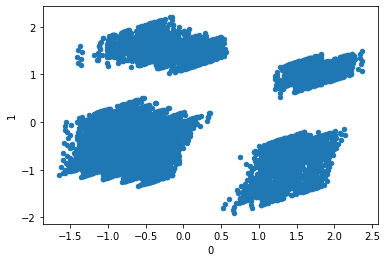

In [213]:
data2.plot(x=0,y=1, kind ='scatter')

# we can see 4 clusters clearly
let us try elbow method

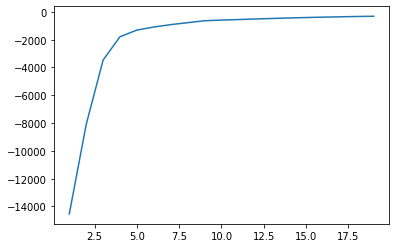

In [215]:
#determining clusters
#elbow method
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data2) for i in n_cluster]
scores = [kmeans[i].score(data2) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

In [216]:
#choosing 4 clusters
df['cluster'] = kmeans[3].predict(data2)
df['principal_feature1'] = data2[0]
df['principal_feature2'] = data2[1]
df['cluster'].value_counts()

C:\Users\kitri\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    3721
2    1522
1    1428
3     596
Name: cluster, dtype: int64

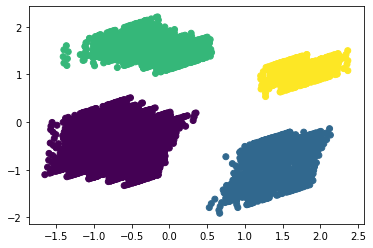

In [217]:
#plotting clusters
plt.scatter(df['principal_feature1'], df['principal_feature2'], c=df["cluster"])
plt.show()

# Big Distances from the centroid are considered anomaly
let us try to find big distances from each cluster and that big distances are anamoly

In [226]:
distance = getDistanceByPoint(data2, kmeans[3])

def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.at[i]= np.linalg.norm(Xa-Xb)
    return distance

#setting outliers to 0.01 of the whole data
outliers_fraction = 0.01
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()


C:\Users\kitri\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


In [227]:
df['anomaly'] = (distance >= threshold).astype(int)

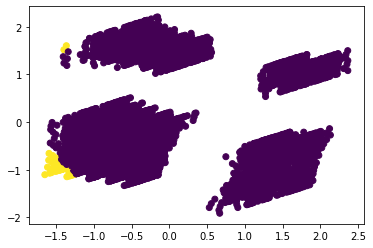

In [228]:
#visualizing clusterized view of anomaly

plt.scatter(df['principal_feature1'], df['principal_feature2'], c=df["anomaly"])
plt.show()

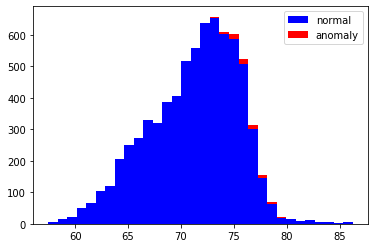

In [229]:
# anomaly visualization throughout temperature

a = df.loc[df['anomaly'] == 0, 'value']
b = df.loc[df['anomaly'] == 1, 'value']

fig, axs = plt.subplots()
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
plt.legend()
plt.show()

#observing time series anomalies

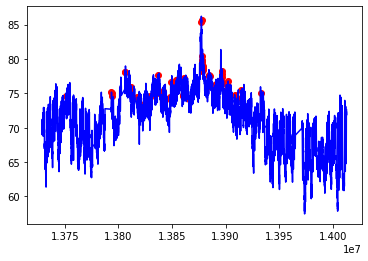

In [234]:
df['time_epoch']= data["time_epoch"]

a = df.loc[df['anomaly'] == 1, ['time_epoch', 'value']] #anomaly

plt.plot(df['time_epoch'], df['value'], color='blue')
plt.scatter(a['time_epoch'],a['value'], color='red')

In [240]:
#anamolies dataframe according to cluster method

df[df["anomaly"]==1]

,value,daylight,DayOfTheWeek,hours,isWeekDay,cluster,principal_feature1,principal_feature2,anomaly,time_epoch
590,74.659104,1,0,22,1,0,-1.427178,-0.993166,1,13751352
1558,75.181752,1,0,20,1,0,-1.419990,-0.849653,1,13793616
1559,74.681577,1,0,21,1,0,-1.412839,-0.916039,1,13793652
1560,75.032513,1,0,22,1,0,-1.443976,-1.001563,1,13793688
1824,78.089981,1,1,21,1,0,-1.320055,-1.058256,1,13806612
...,...,...,...,...,...,...,...,...,...,...
4587,73.008621,1,0,22,1,0,-1.352929,-0.956051,1,13908600
4754,75.473359,1,0,21,1,0,-1.448458,-0.933844,1,13914612
4755,74.354801,1,0,22,1,0,-1.413488,-0.986323,1,13914648
4923,72.899337,1,0,22,1,0,-1.348013,-0.953593,1,13920696


We are indeed getting some anamolies at higher temperature but cannot be sure because it also includes average temperature and cluster method forgot about low temperature anomalies.
We should try different methods like and see the results

#Gaussian 

In [270]:
#ellipical envelope method for outlier detection
outliers_fraction =0.05
temperature_df = df[['value']]
envelope =  EllipticEnvelope(contamination = outliers_fraction) 
X_train = temperature_df.values.reshape(-1,1)


In [273]:
envelope.fit(X_train)

EllipticEnvelope(assume_centered=False, contamination=0.05, random_state=None,
                 store_precision=True, support_fraction=None)

In [276]:
temperature_df["decision_boundary"]= envelope.decision_function(X_train)
temperature_df["is_anomaly"]= envelope.predict(X_train)

C:\Users\kitri\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\kitri\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [290]:
#-1 is anamoly right now
temp_anomaly = temperature_df[temperature_df["is_anomaly"]==-1]

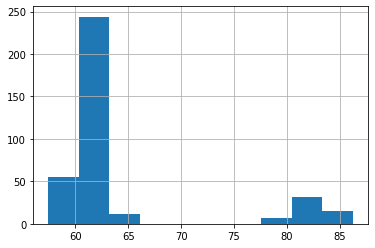

In [291]:
#Distribution of anomaly temperatures
temp_anomaly["value"].hist()

clearly extreme temperatures have more anomalies. perticularly when when the temperature is between 60 and 64 F

In [278]:
df_gaussian = df

In [303]:
df_gaussian["anamoly"]= temperature_df["is_anomaly"]
df_gaussian['anomaly'] = np.array(temperature_df['is_anomaly'] == -1).astype(int) 

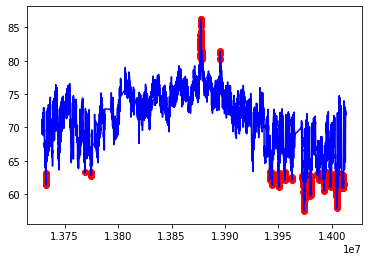

In [296]:
a = df_gaussian.loc[df_gaussian['anomaly'] == 1, ('time_epoch', 'value')] #anomaly

plt.plot(df_gaussian['time_epoch'], df['value'], color='blue')
plt.scatter(a['time_epoch'],a['value'], color='red')
plt.show()

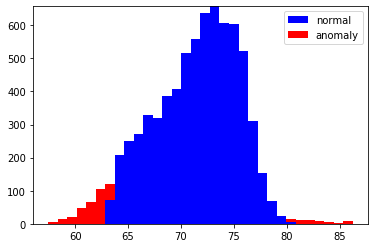

In [306]:
a = df_gaussian.loc[df['anomaly'] == 0, 'value']
b = df_gaussian.loc[df['anomaly'] == 1, 'value']


plt.hist([a,b], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
plt.legend()
plt.show()

In [ ]:
#This gives a good idea about anomaly lying at the extreme temperature.

#Isolation Forest

In [319]:
df_isolationf = df
data = df_isolation[['value', 'hours', 'daylight', 'DayOfTheWeek', 'isWeekDay']]
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train isolation forest 
model =  IsolationForest(contamination = outliers_fraction)
model.fit(data)
# add the data to the main  
df_isolationf['anomaly_isolationf'] = pd.Series(model.predict(data))
df_isolationf['anomaly_isolationf'] = df_isolationf['anomaly_isolationf'].map( {1: 0, -1: 1} )
print(df['anomaly_isolationf'].value_counts())

0    6904
1     363
Name: anomaly_isolationf, dtype: int64


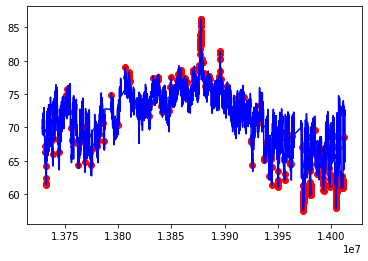

In [321]:
a = df_isolationf.loc[df_isolationf['anomaly_isolationf'] == 1, ('time_epoch', 'value')] #anomaly

plt.plot(df_isolationf['time_epoch'], df_isolationf['value'], color='blue')
plt.scatter(a['time_epoch'],a['value'], color='red')
plt.show()

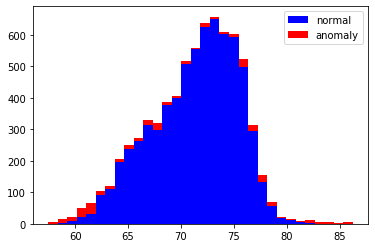

In [322]:
a = df_isolationf.loc[df_isolationf['anomaly_isolationf'] == 0, 'value']
b = df_isolationf.loc[df_isolationf['anomaly_isolationf'] == 1, 'value']


plt.hist([a,b], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
plt.legend()
plt.show()

#One Class SVM

In [323]:
df_isolationf = df
data = df_isolationf[['value', 'hours', 'daylight', 'DayOfTheWeek', 'isWeekDay']]
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train one way svm 
model =  OneClassSVM(nu=0.95 * outliers_fraction)
model.fit(data)
# add the data to the main  
df_isolationf['anomaly_isolationf'] = pd.Series(model.predict(data))
df_isolationf['anomaly_isolationf'] = df_isolationf['anomaly_isolationf'].map( {1: 0, -1: 1} )
print(df['anomaly_isolationf'].value_counts())

0    6921
1     346
Name: anomaly_isolationf, dtype: int64


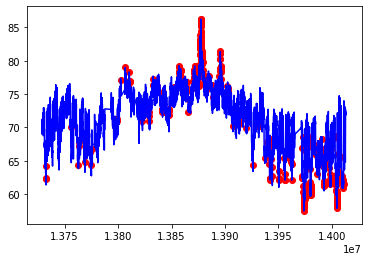

In [324]:
a = df_isolationf.loc[df_isolationf['anomaly_isolationf'] == 1, ('time_epoch', 'value')] #anomaly

plt.plot(df_isolationf['time_epoch'], df_isolationf['value'], color='blue')
plt.scatter(a['time_epoch'],a['value'], color='red')
plt.show()

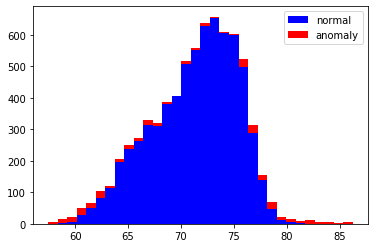

In [325]:
a = df_isolationf.loc[df_isolationf['anomaly_isolationf'] == 0, 'value']
b = df_isolationf.loc[df_isolationf['anomaly_isolationf'] == 1, 'value']


plt.hist([a,b], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
plt.legend()
plt.show()

In [ ]:
#gives similar result as compared to isolation forest

# In my opinion, extreme temperatures seems the culprit but i would like to have opinion based on clustering or gaussian technique for deploying purpose.